Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters: {'C': 0.01, 'degree': 4, 'gamma': 1, 'kernel': 'poly'}
Accuracy: 0.9325842696629213
Precision: 1.0
Recall: 0.88
F1 Score: 0.9361702127659575


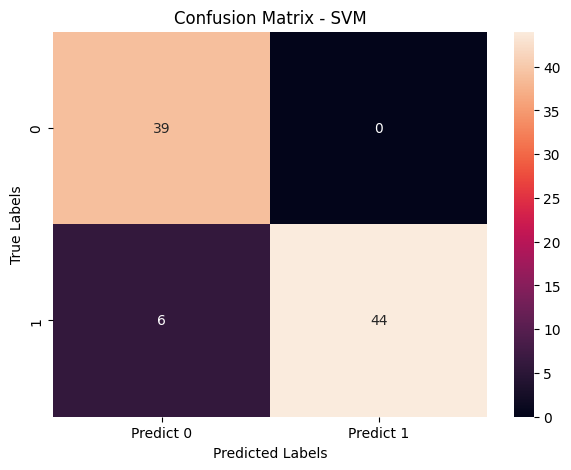

TP = 44
TN = 39
FN = 6
FP = 0
ACCURACY of model is: 93.26%
SENSITIVITY of the model is: 88.00%
SPECIFICITY of the model is: 100.00%
FALSE POSITIVE RATE of the model is: 0.00%
PRECISION of the model is: 100.00%
Classification Report - SVM
              precision    recall  f1-score   support

           1       1.00      0.88      0.94        50
           0       0.87      1.00      0.93        39

    accuracy                           0.93        89
   macro avg       0.93      0.94      0.93        89
weighted avg       0.94      0.93      0.93        89



In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
data_path = 'Data - Parkinsons.csv'
pdata = pd.read_csv(data_path)

# Data preprocessing
pdata = pdata.drop(['name'], axis=1)  # Drop non-numeric or unnecessary columns
X = pdata.drop(['status'], axis=1)
y = pdata[['status']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_resampled, y_resampled.values.ravel())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.30, random_state=42)

# Define an expanded parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],  # Only for polynomial kernel
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]  # Only for rbf, poly, sigmoid kernels
}

# Create an SVM model
svm = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_svm = grid_search.best_estimator_
y_predicted_svm = best_svm.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_predicted_svm)
precision = precision_score(y_test, y_predicted_svm)
recall = recall_score(y_test, y_predicted_svm)
f1 = f1_score(y_test, y_predicted_svm)
conf_matrix = confusion_matrix(y_test, y_predicted_svm)

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
df_cm_svm = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Predict 0', 'Predict 1'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_svm, annot=True, fmt='g')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Additional metrics
TN, FP, FN, TP = conf_matrix.ravel()
print("TP =", TP)
print("TN =", TN)
print("FN =", FN)
print("FP =", FP)
print(f'ACCURACY of model is: {(TP + TN) / float(TP + TN + FN + FP) * 100:.2f}%')
print(f'SENSITIVITY of the model is: {TP / float(TP + FN) * 100:.2f}%')
print(f'SPECIFICITY of the model is: {TN / float(TN + FP) * 100:.2f}%')
print(f'FALSE POSITIVE RATE of the model is: {FP / float(TN + FP) * 100:.2f}%')
print(f'PRECISION of the model is: {TP / float(TP + FP) * 100:.2f}%')
print("Classification Report - SVM")
print(classification_report(y_test, y_predicted_svm, labels=[1, 0]))
